# install pakages

In [ ]:
!pip install controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.1 MB/s eta 0:00:00
  Created wheel for controlnet_aux: filename=controlnet_aux-0.0.7-py3-none-any.whl size=274341 sha256=f54e99e791b0109c756a6f1f142e91fbeb41164aaff8211648082162c8cb4b8b
  Stored in directory: /root/.cache/pip/wheels/1e/3e/93/6678b4c0bc2ec31d53409b25d4189cbb08bae843e8b2b78e52
Successfully built controlnet_aux


In [ ]:
!pip install diffusers transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 34.6 MB/s eta 0:00:00


In [ ]:
!pip install -U xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install --pre -U xformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.6/211.6 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: xformers
    Found existing installation: xformers 0.0.22
    Uninstalling xformers-0.0.22:
      Successfully uninstalled xformers-0.0.22


In [ ]:
!pip install torch
#!pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/rocm5.1.1

# loading image and models

In [ ]:
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
from controlnet_aux import HEDdetector
from diffusers.utils import load_image
from google.colab import drive
drive.mount('/content/drive')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

ValueError: ignored

In [ ]:
origin_image = load_image("/content/drive/MyDrive/drawing/bad/monkey.jpg")
hed = HEDdetector.from_pretrained("lllyasviel/sd-controlnet-hed")
image = hed(origin_image, scribble=True)

In [ ]:
pip install controlnet_aux

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-hed", torch_dtype=torch.float16
)
# lllyasviel/sd-controlnet-hed
# lllyasviel/sd-controlnet-canny
# lllyasviel/sd-controlnet-scribble
# instruction-tuning-sd/cartoonizer

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
image

# New Section

In [ ]:
import torch
import os
from huggingface_hub import HfApi
from pathlib import Path
from diffusers.utils import load_image
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from diffusers import (
    ControlNetModel,
    StableDiffusionControlNetPipeline,
    UniPCMultistepScheduler,
)

from google.colab import drive
drive.mount('/content/my_drive')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/my_drive


In [ ]:
# init
checkpoint = "lllyasviel/control_v11p_sd15_canny"
names = ['monkey']
image_path ="/content/my_drive/MyDrive/drawing/bad/"
extension =".jpg"
images = []
low_threshold = 100
high_threshold = 200

In [ ]:
#preprocessing
for name in names:
  image = (np.array(load_image(image_path + name + extension)))
  image = cv2.Canny(image, low_threshold, high_threshold)
  image = image[:, :, None]
  images.append(np.concatenate([image, image, image], axis=2))

control_images = []

for image in images:
  control_images.append(Image.fromarray(image))

controlnet = ControlNetModel.from_pretrained(checkpoint, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
generator = torch.manual_seed(139)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
#generation
promts = ['Monkey']
result_images = []
for i in range(1):
  result_images.append(pipe(
    promts[i] + "Monkey sketch, Monkey drawing, sketch, hight quality, best quality, extremely detailed, No colors, Major quality",
    num_inference_steps = 20,
    generator=generator,
    image=control_images[i]).images[0])



  0%|          | 0/20 [00:00<?, ?it/s]

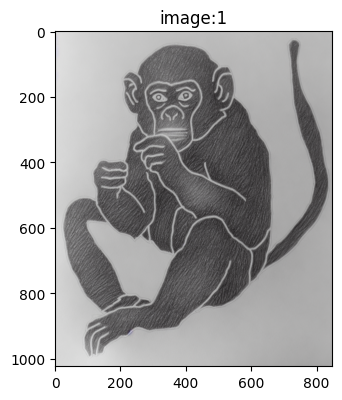

In [ ]:
fig = plt.figure(figsize = (20,20))
for index,result_image in enumerate(result_images):
  plt.subplot(4,4,index+1)
  plt.imshow(result_image)
  plt.title("image:"+str(index+1))

# Generation Images

In [ ]:
import cv2
# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
# pipe.enable_xformers_memory_efficient_attention()

# pipe.enable_model_cpu_offload()

pipe = pipe.to("cuda")
prompt = "Cat sketch,Cat drawing, hight quality, best quality, extremely detailed,No colors,Major quality"
result_image = [pipe(prompt, image, num_inference_steps=20).images[0] for _ in range(5)]
result_image.insert(0,origin_image)
result_image

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=283x332 at 0x7F9BE15ED540>,
 <PIL.Image.Image image mode=RGB size=512x576 at 0x7F9C23F9BE20>,
 <PIL.Image.Image image mode=RGB size=512x576 at 0x7F9BE15CF2E0>,
 <PIL.Image.Image image mode=RGB size=512x576 at 0x7F9C20902290>,
 <PIL.Image.Image image mode=RGB size=512x576 at 0x7F9C20901F90>,
 <PIL.Image.Image image mode=RGB size=512x576 at 0x7F9C20903610>]

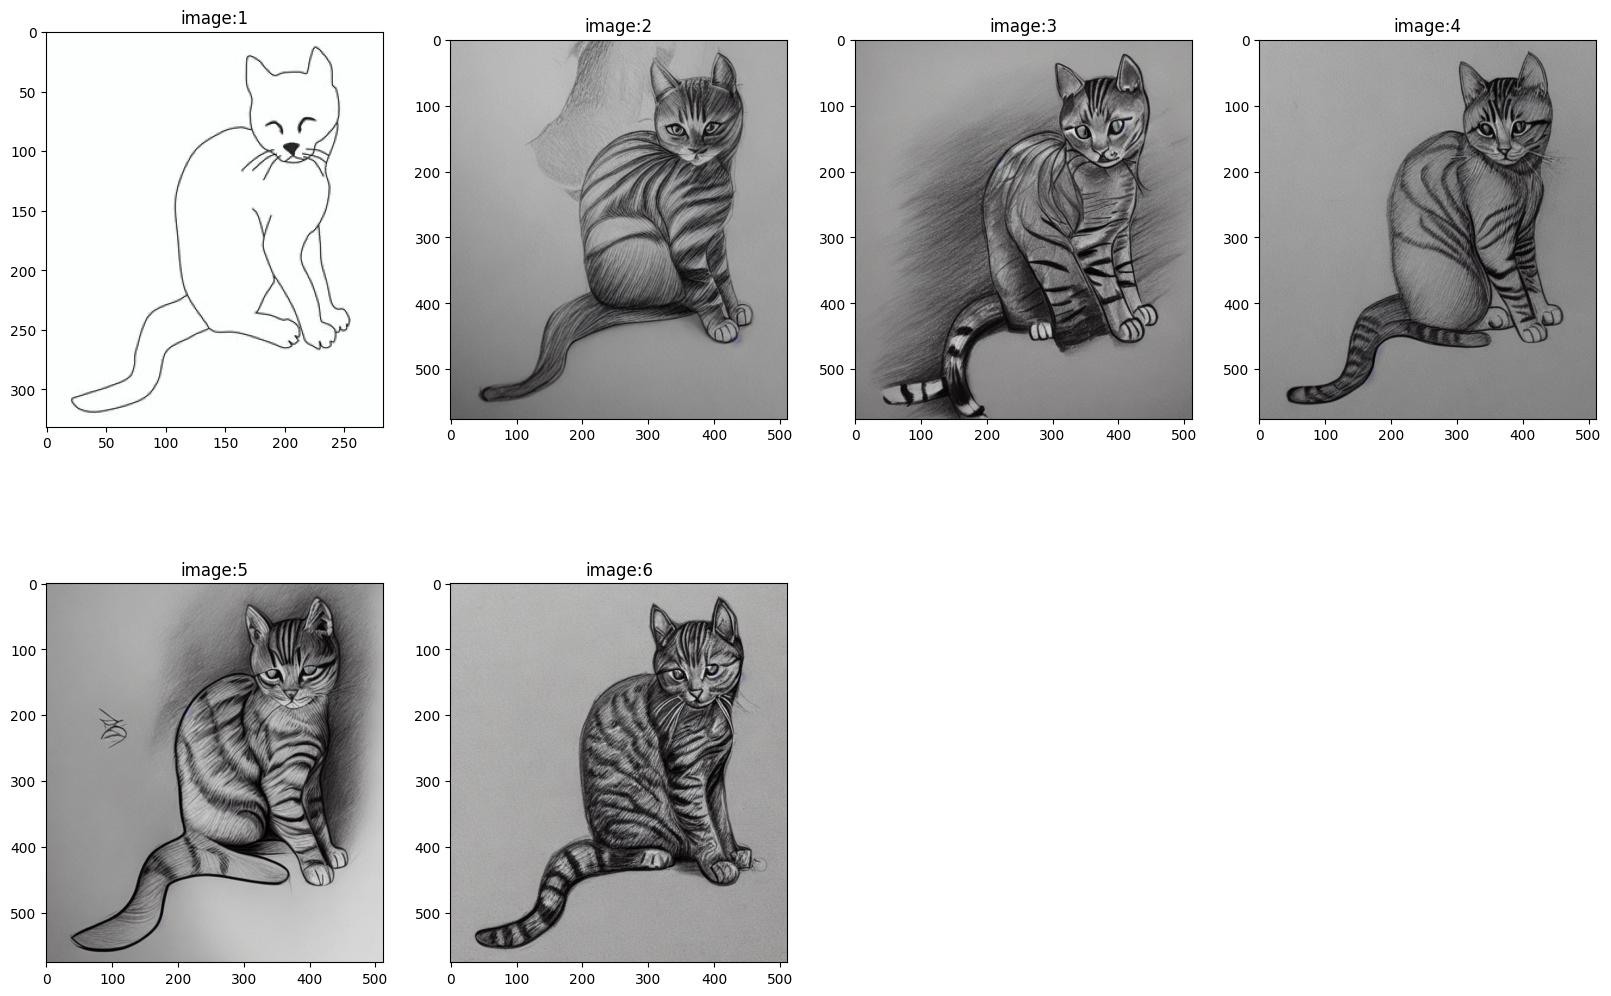

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20,20))
for index,image in enumerate(result_image):
  plt.subplot(3,4,index+1)
  plt.imshow(image)
  plt.title("image:"+str(index+1))

In [ ]:
# generator = [torch.Generator(device="cpu").manual_seed(2) for i in range(3)]

# output= pipe(
#     "Major quality Cat sketch",
#     image,
#     num_inference_steps=20,
#     generator=generator

# )
# image_grid(output.images, 2, 2)

# Classification

In [ ]:
!pip install transformers
!pip install datasets
from transformers import AutoImageProcessor, ResNetForImageClassification,ConvNextFeatureExtractor, ConvNextForImageClassification,AutoModelForImageClassification,BeitImageProcessor, BeitForImageClassification
import torch
from datasets import load_dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Resnet-50
# processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
# model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

#facebook
# feature_extractor = ConvNextFeatureExtractor.from_pretrained("facebook/convnext-large-224")
# model = ConvNextForImageClassification.from_pretrained("facebook/convnext-large-224")

#google mobilenet
# preprocessor = AutoImageProcessor.from_pretrained("google/mobilenet_v1_0.75_192")
# model = AutoModelForImageClassification.from_pretrained("google/mobilenet_v1_0.75_192")

# beit-sketch
processor = BeitImageProcessor.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224-pt22k-ft22k')

In [ ]:
inputs = processor(origin_image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

skep


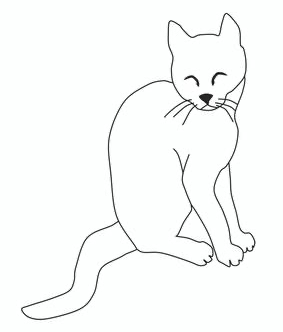

In [ ]:
origin_image

# Segmentation

In [ ]:
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation,AutoImageProcessor, Mask2FormerForUniversalSegmentation,SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image

In [ ]:
processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-cityscapes-semantic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-cityscapes-semantic")
inputs = processor(images=result_image[3], return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

prediction = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
print(prediction.keys())

`label_ids_to_fuse` unset. No instance will be fused.


dict_keys(['segmentation', 'segments_info'])


In [ ]:
#visual

from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm

def draw_panoptic_segmentation(segmentation, segments_info):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    fig, ax = plt.subplots()
    ax.imshow(segmentation)
    instances_counter = defaultdict(int)
    handles = []
    # for each segment, draw its legend
    for segment in segments_info:
        segment_id = segment['id']
        segment_label_id = segment['label_id']
        segment_label = model.config.id2label[segment_label_id]
        label = f"{segment_label}-{instances_counter[segment_label_id]}"
        instances_counter[segment_label_id] += 1
        color = viridis(segment_id)
        handles.append(mpatches.Patch(color=color, label=label))

    ax.legend(handles=handles)

<ipython-input-60-2c4acd3b5e34>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', torch.max(segmentation))


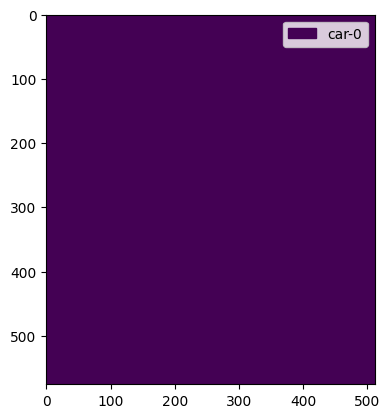

In [ ]:
draw_panoptic_segmentation(**prediction)

# Nvidia segmentation



In [ ]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image

In [ ]:
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b5-finetuned-cityscapes-1024-1024")

inputs = feature_extractor(images=origin_image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  # shape (batch_size, num_labels, height/4, width/4)

print(logits)

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:99: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:4                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'origin_image' is not defined